Original Class Distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Balanced Class Distribution:
Diabetes_012
0.0    10000
1.0    10000
2.0    10000
Name: count, dtype: int64

Balanced CDC data saved to data/processed/CDC_Cleaned.csv


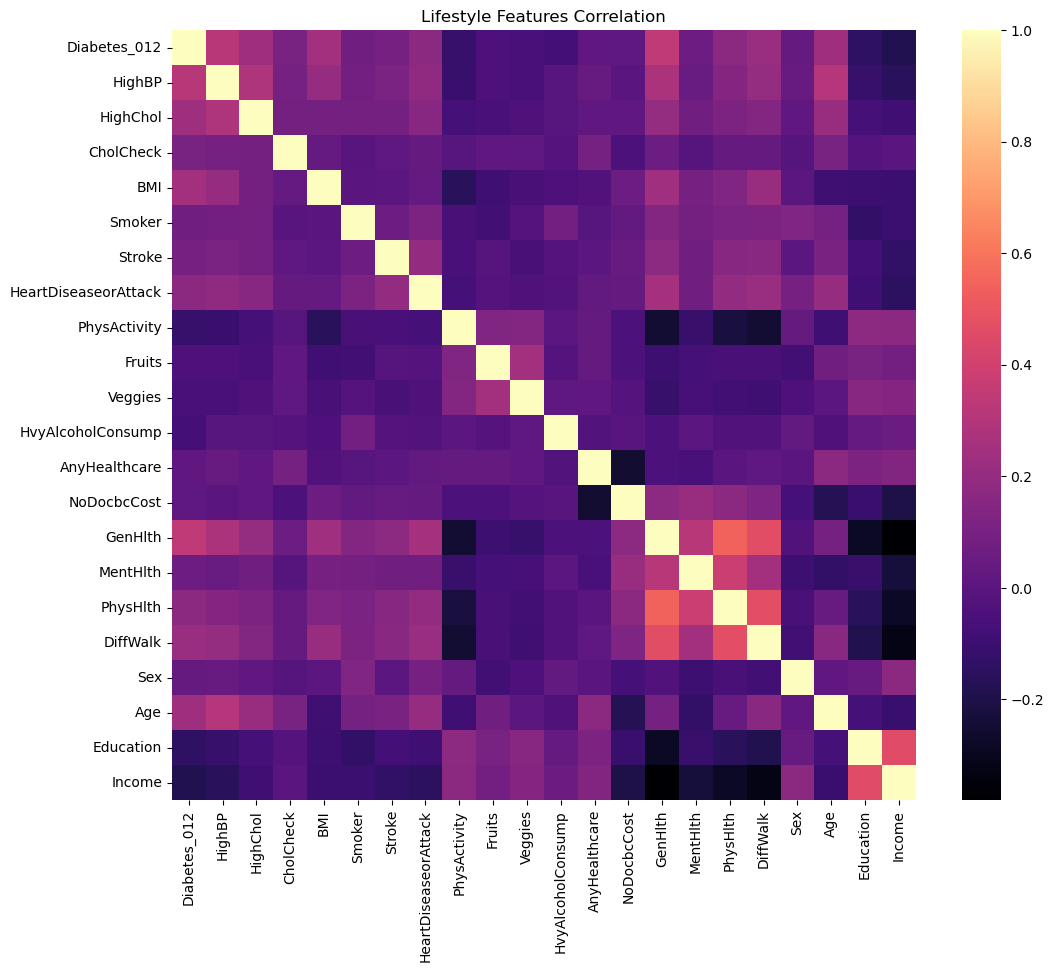

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# 1. Load the dataset
df_cdc = pd.read_csv('../data/raw/CDCdiabetes.csv')

# 2. Check the distribution of the target (Diabetes_012)
print("Original Class Distribution:")
print(df_cdc['Diabetes_012'].value_counts())

# 3. Handling Imbalance: Downsampling
# We separate the classes
df_no = df_cdc[df_cdc['Diabetes_012'] == 0]
df_pre = df_cdc[df_cdc['Diabetes_012'] == 1]
df_dia = df_cdc[df_cdc['Diabetes_012'] == 2]

# Downsample the majority class (0) to match the size of the others
# Let's aim for a balanced set of 10,000 samples per class for speed
n_samples = 10000 
df_no_downsampled = resample(df_no, replace=False, n_samples=n_samples, random_state=42)
df_pre_upsampled = resample(df_pre, replace=True, n_samples=n_samples, random_state=42) # Pre-diabetic is usually very small
df_dia_downsampled = resample(df_dia, replace=False, n_samples=n_samples, random_state=42)

# Combine back into one dataframe
df_balanced = pd.concat([df_no_downsampled, df_pre_upsampled, df_dia_downsampled])

print("\nBalanced Class Distribution:")
print(df_balanced['Diabetes_012'].value_counts())

# 4. Save the cleaned version
df_balanced.to_csv('../data/processed/CDC_Cleaned.csv', index=False)
print("\nBalanced CDC data saved to data/processed/CDC_Cleaned.csv")

# 5. Visualizing the lifestyle correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df_balanced.corr(), annot=False, cmap='magma') # Annot=False because there are many columns
plt.title("Lifestyle Features Correlation")
plt.show()


In [1]:
# 1. Class Distribution (Shows why you needed SMOTE)
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Class Distribution (0:Healthy, 1:Pre, 2:Diabetic)')
plt.show()

# 2. BMI vs Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI Levels across Diabetes Categories')
plt.show()

NameError: name 'plt' is not defined

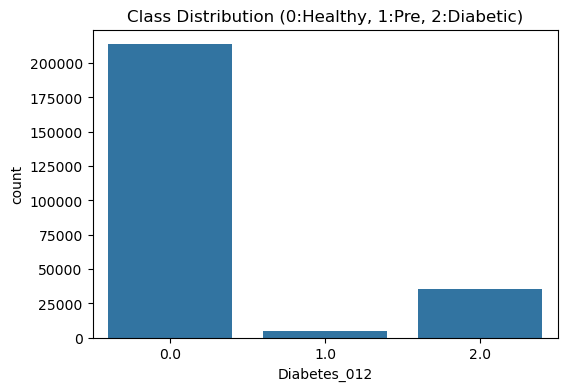

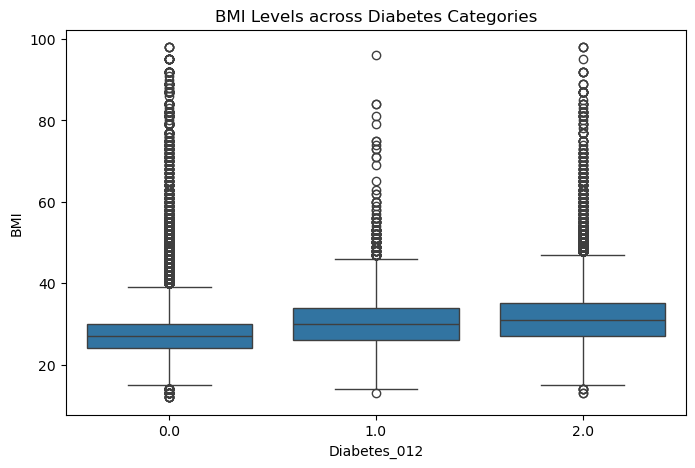

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CORRECT PATH for CDC Raw Data
df = pd.read_csv('../data/raw/CDCdiabetes.csv')

# 1. Class Distribution (0, 1, 2)
plt.figure(figsize=(6, 4))
# 'Diabetes_012' is the standard column name in the BRFSS dataset
sns.countplot(x='Diabetes_012', data=df)
plt.title('Class Distribution (0:Healthy, 1:Pre, 2:Diabetic)')
plt.show()

# 2. BMI vs Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI Levels across Diabetes Categories')
plt.show()